# Introduction to Regression with statsmodels in Python

## Simple Linear Regression Modeling

### A tale of two variables

In [1]:
import pandas as pd

df_trs = pd.read_csv(r'./data/taiwan_real_estate2.csv')
df_trs.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

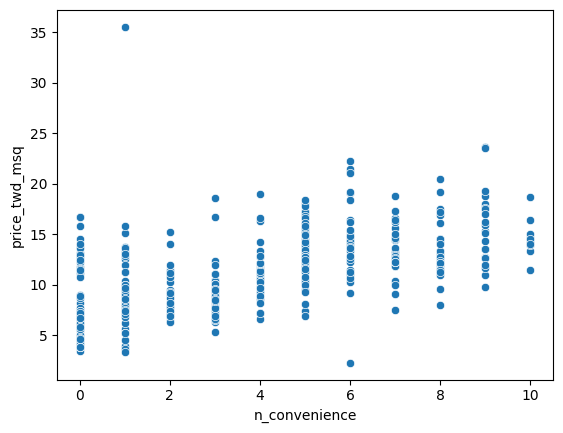

In [3]:
# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=df_trs)


# Show the plot
plt.show()

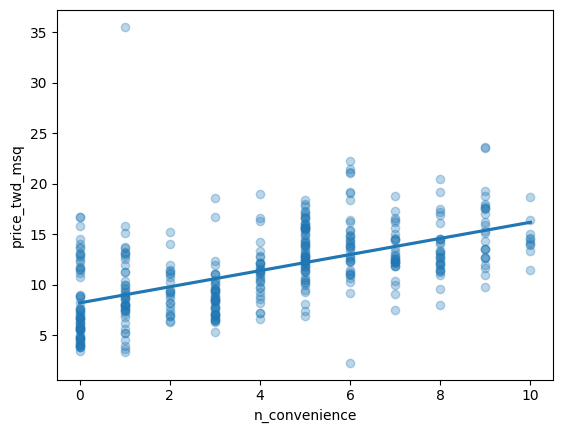

In [4]:
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(
    x="n_convenience"
    , y="price_twd_msq"
    , data=df_trs
    , ci = None
    , scatter_kws = {'alpha': 0.3}
)

# Show the plot
plt.show()

### Fitting a linear regression

In [5]:
import statsmodels.formula.api as sfa

In [6]:
# Use ols function - Ordinary Least Squared
# Create the model object
mdl_price_vs_conv = sfa.ols('price_twd_msq ~ n_convenience', data=df_trs)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


### Categorical explanatory variables

In [7]:
import seaborn as sns

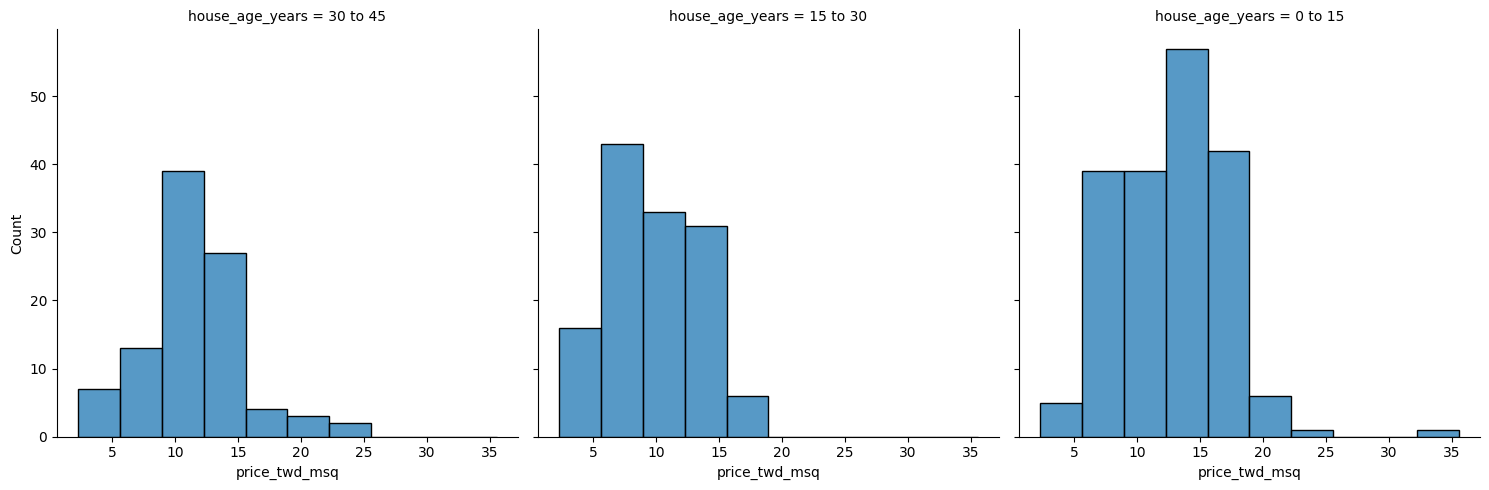

In [8]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(
    data=df_trs
    , x='price_twd_msq'
    , col='house_age_years'
    , col_wrap=3
    , bins=10)

# Show the plot
plt.show();

In [9]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = df_trs.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [10]:
# Create the model, fit it
mdl_price_vs_age = sfa.ols('price_twd_msq ~ house_age_years', data=df_trs).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [11]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = sfa.ols("price_twd_msq ~ house_age_years +0", data=df_trs).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


## Predictions and Model Objects

### Making predictions

In [12]:
import numpy as np

# Create explanatory dataset with number of convenience stores from 0 to 10
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict price_twd_msq for the explanatory data
predicted_price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

print(predicted_price_twd_msq)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


In [13]:
# Create prediction dataset
prediction_data = explanatory_data.assign(
  predicted_price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)
)

prediction_data

,n_convenience,predicted_price_twd_msq
0,0,8.224237
1,1,9.022317
2,2,9.820397
3,3,10.618477
4,4,11.416556
5,5,12.214636
6,6,13.012716
7,7,13.810795
8,8,14.608875
9,9,15.406955


### Visualizing Predictions

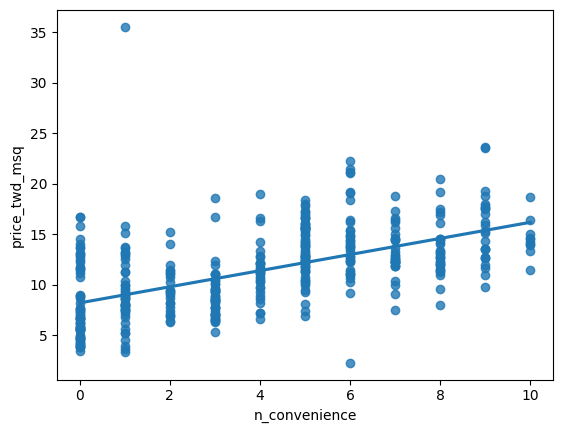

In [14]:
# Create a new figure for plotting

fig = plt.figure()

sns.regplot(
  data=df_trs
  , x='n_convenience'
  , y='price_twd_msq'
  , ci=None
)
plt.show();

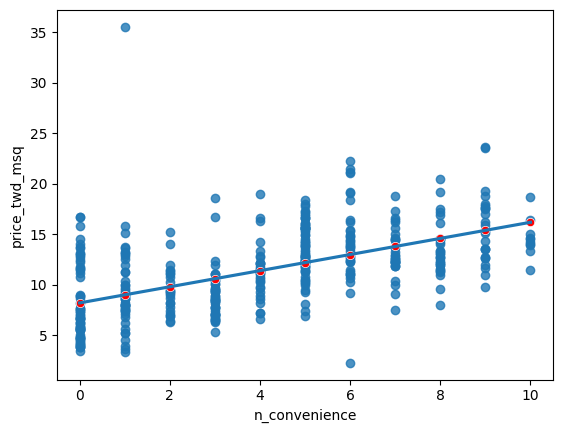

In [15]:
sns.regplot(
  data=df_trs
  , x='n_convenience'
  , y='price_twd_msq'
  , ci=None
)

sns.scatterplot(
  data=prediction_data
  , x='n_convenience'
  , y='predicted_price_twd_msq'
  , color='red'
)
plt.show();

In [16]:
# Create impossible data
impossible = pd.DataFrame({'n_convenience':[-1, 2.5]})
mdl_price_vs_conv.predict(impossible)

0     7.426158
1    10.219437
dtype: float64

### Working with Model Objects

In [17]:
mdl_price_vs_conv.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

In [18]:
mdl_price_vs_conv.fittedvalues

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64

In [19]:
mdl_price_vs_conv.resid

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64

In [20]:
mdl_price_vs_conv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sat, 11 May 2024   Prob (F-statistic):           3.41e-37
Time:                        07:26:40   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857      0.000       7.664       8.784
n_convenience     0.7981      0.057     14.118      0.000       0.687       0.909
==============================================================================
Omnibus:                      171.927   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.242
Skew:                           1.553   Prob(JB):                    1.78e-308
Kurtosis:                      11.516   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
coeffs = mdl_price_vs_conv.params
intercept = coeffs[0]
slope = coeffs[1]
ptm = intercept + (slope*explanatory_data)
ptm

C:\Users\anshu\AppData\Local\Temp\ipykernel_94868\233701026.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = coeffs[0]
C:\Users\anshu\AppData\Local\Temp\ipykernel_94868\233701026.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = coeffs[1]


,n_convenience
0,8.224237
1,9.022317
2,9.820397
3,10.618477
4,11.416556
5,12.214636
6,13.012716
7,13.810795
8,14.608875
9,15.406955


In [22]:
print(
  ptm.assign( pred_auto = mdl_price_vs_conv.predict(explanatory_data) )
)

    n_convenience  pred_auto
0        8.224237   8.224237
1        9.022317   9.022317
2        9.820397   9.820397
3       10.618477  10.618477
4       11.416556  11.416556
5       12.214636  12.214636
6       13.012716  13.012716
7       13.810795  13.810795
8       14.608875  14.608875
9       15.406955  15.406955
10      16.205035  16.205035


### Regression to the mean

In [23]:
sp500_yearly_returns = pd.read_csv(r'./data/sp500_yearly_returns.csv')
sp500_yearly_returns.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


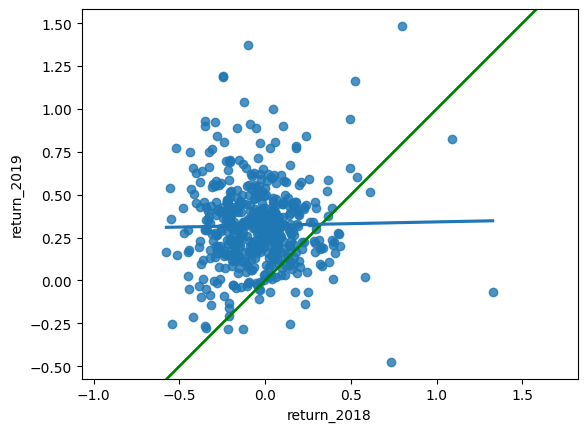

In [24]:
fig = plt.figure()

plt.axline(
  xy1=(0,0)
  , slope=1
  , linewidth=2
  , color='green'
)

sns.regplot(
  data=sp500_yearly_returns
  , x='return_2018'
  , y='return_2019'
  , ci=None
)

plt.axis('equal')
plt.show();

In [25]:
mdl_returns = sfa.ols('return_2019 ~ return_2018', data=sp500_yearly_returns).fit()
print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


In [26]:
explanatory_data = pd.DataFrame({'return_2018': [-1,0,1]})

In [27]:
mdl_returns.predict(explanatory_data)

0    0.301251
1    0.321321
2    0.341390
dtype: float64

### Transforming Variables

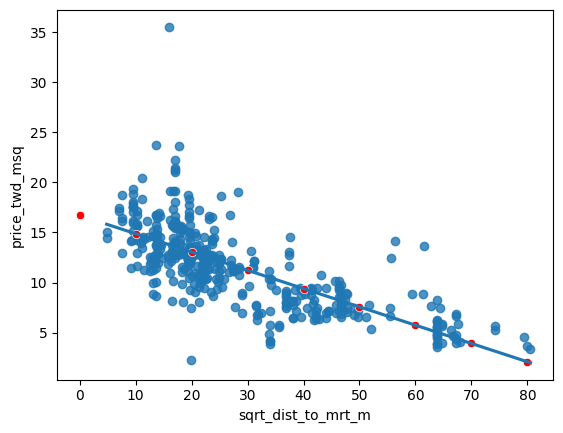

In [28]:
import numpy as np
# Create sqrt_dist_to_mrt_m
df_trs["sqrt_dist_to_mrt_m"] = np.sqrt(df_trs["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = sfa.ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=df_trs).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({
    "sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2)
    , "dist_to_mrt_m": np.arange(0, 81, 10) ** 2}
    )

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=df_trs, ci=None)

# Add a layer of your prediction points
sns.scatterplot(
    data=prediction_data
    , x='sqrt_dist_to_mrt_m'
    , y='price_twd_msq'
    , color='red')
plt.show()

In [29]:
ad_conversion = pd.read_csv(r'./data/ad_conversion.csv')
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


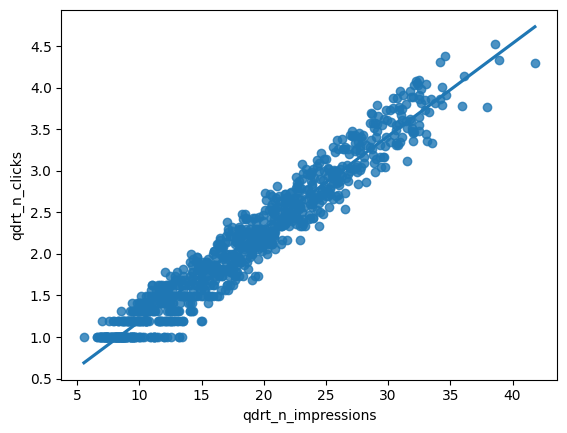

In [30]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion['n_impressions']**0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion['n_clicks']**0.25

plt.figure()

# Plot using the transformed variables
sns.regplot(
    data=ad_conversion
    , x='qdrt_n_impressions'
    , y='qdrt_n_clicks'
    , ci=None
)
plt.show()

In [31]:
# Run a linear regression of your transformed variables
mdl_click_vs_impression = sfa.ols('qdrt_n_clicks ~ qdrt_n_impressions', data=ad_conversion).fit()
mdl_click_vs_impression.params

Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64

In [32]:
explanatory_data = \
    pd.DataFrame(
        {"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25
         , "n_impressions": np.arange(0, 3e6+1, 5e5)
        }
    )

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


### Back Transformations

In [33]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data['qdrt_n_clicks']**4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


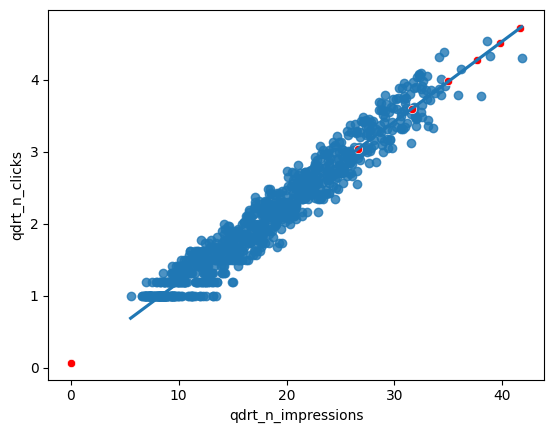

In [34]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data=prediction_data, x='qdrt_n_impressions', y='qdrt_n_clicks', color='red')
plt.show()

## Assessing model fit

### Quantifying Model Fit

In [35]:
# Read in Ad data
ad_conversion = pd.read_csv(r'./data/ad_conversion.csv')
ad_conversion.head()
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion['n_impressions']**0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion['n_clicks']**0.25

In [36]:
# Run a linear regression of your original variables
mdl_click_vs_impression_orig = sfa.ols('n_clicks ~ n_impressions', data=ad_conversion).fit()

# Run a linear regression of your transformed variables
mdl_click_vs_impression_trans = sfa.ols('qdrt_n_clicks ~ qdrt_n_impressions', data=ad_conversion).fit()

In [37]:
mdl_click_vs_impression_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        07:26:42   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133      0.033       0.135       3.231
n_impressions     0.0002   1.96e-06     87.654      0.000       0.000       0.000
==============================================================================
Omnibus:                      247.038   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13215.277
Skew:                          -0.258   Prob(JB):                         0.00
Kurtosis:                      21.401   Cond. No.                     4.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
mdl_click_vs_impression_trans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        07:26:42   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0.017      4.171      0.000       0.038       0.106
qdrt_n_impressions     0.1115      0.001    126.108      0.000       0.110       0.113
==============================================================================
Omnibus:                       11.447   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.637
Skew:                          -0.216   Prob(JB):                      0.00490
Kurtosis:                       2.707   Cond. No.                         52.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


In [40]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(ad_conversion['n_clicks'].corr(ad_conversion['n_impressions'])**2)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(ad_conversion['qdrt_n_clicks'].corr(ad_conversion['qdrt_n_impressions'])**2)

0.8916134973508025
0.9445272817143902


In [41]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875722


### Visualizing Model Fit

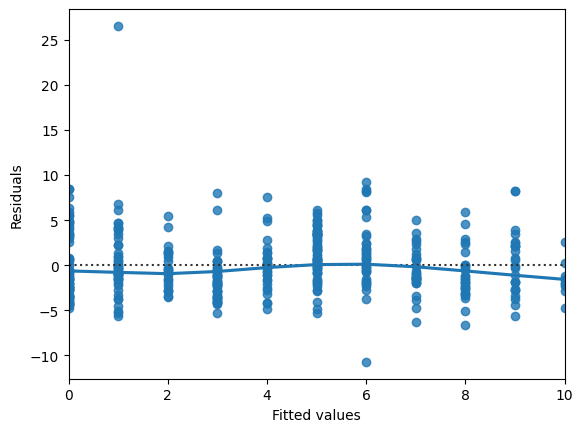

In [42]:
# Plot the residuals vs. fitted values
sns.residplot(
    data=df_trs
    , x='n_convenience'
    , y='price_twd_msq'
    , lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

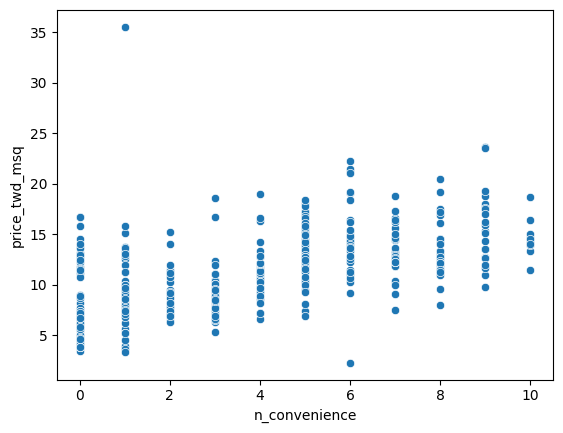

In [43]:
sns.scatterplot(
  data=df_trs
  , x='n_convenience'
  , y='price_twd_msq'
)

<Axes: xlabel='price_twd_msq', ylabel='n_convenience'>

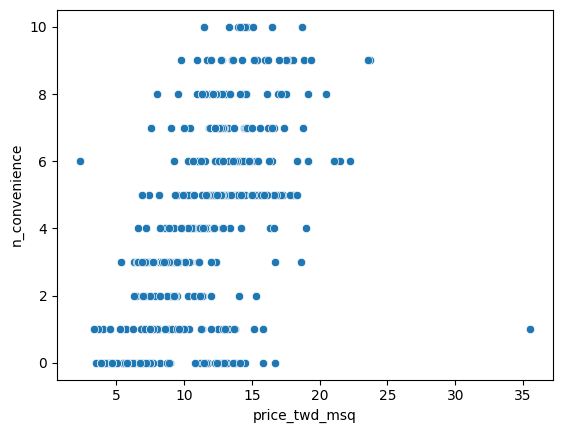

In [44]:
sns.scatterplot(
  data=df_trs
  , y='n_convenience'
  , x='price_twd_msq'
)

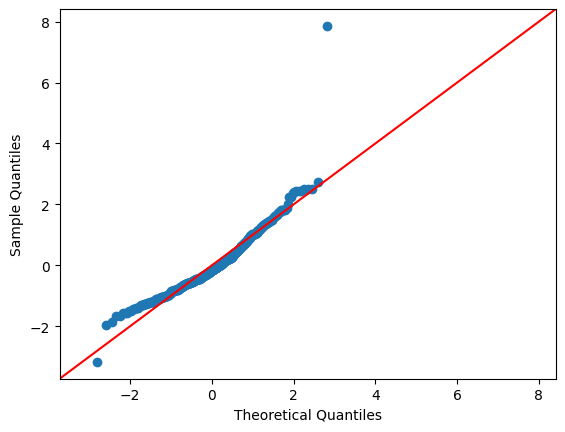

In [45]:
# Import qqplot
import statsmodels.api as sma #.api import qqplot

# Create the Q-Q plot of the residuals
sma.qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

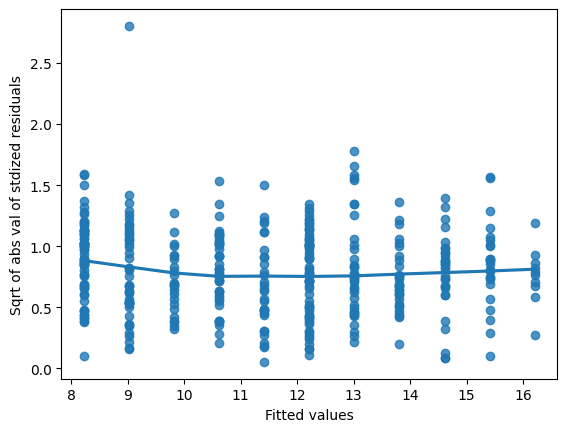

In [46]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(
    x=mdl_price_vs_conv.fittedvalues
    , y=model_norm_residuals_abs_sqrt
    , ci=None
    , lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

### Outliers, leverage, and influence

In [47]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()
summary_info.head()

,dfb_Intercept,dfb_sqrt_dist_to_mrt_m,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.094893,0.073542,4.648246e-03,-1.266363,0.005764,-0.096418,-1.267294,-0.096489
1,-0.013981,0.008690,1.216711e-04,-0.262996,0.003506,-0.015599,-0.262699,-0.015582
2,0.025510,-0.009963,6.231096e-04,0.688143,0.002625,0.035302,0.687703,0.035279
3,0.055525,-0.021686,2.939394e-03,1.494602,0.002625,0.076673,1.496850,0.076789
4,-0.000932,0.000518,6.055123e-07,-0.019716,0.003106,-0.001100,-0.019692,-0.001099


In [48]:
# Add the hat_diag column to taiwan_real_estate, name it leverage
df_trs["leverage"] = summary_info['hat_diag']

# Sort taiwan_real_estate by leverage in descending order and print the head
df_trs.sort_values(by='leverage', ascending=False).head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m,leverage
347,6488.021,1,15 to 30,3.388805,80.548253,0.026665
116,6396.283,1,30 to 45,3.691377,79.976765,0.026135
249,6306.153,1,15 to 30,4.538578,79.411290,0.025617
255,5512.038,1,30 to 45,5.264750,74.243101,0.021142
8,5512.038,1,30 to 45,5.688351,74.243101,0.021142


In [49]:
# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
df_trs['cooks_dist'] = summary_info['cooks_d']

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
df_trs.sort_values(by='cooks_dist', ascending=False).head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m,leverage,cooks_dist
270,252.5822,1,0 to 15,35.552194,15.892835,0.003849,0.115549
148,3780.5900,0,15 to 30,13.645991,61.486503,0.012147,0.052440
228,3171.3290,0,0 to 15,14.099849,56.314554,0.009332,0.035384
220,186.5101,9,30 to 45,23.691377,13.656870,0.004401,0.025123
113,393.2606,6,0 to 15,2.299546,19.830799,0.003095,0.022813


## Simple Logistic Regression Modeling

### Why you need Logistic Regression

In [50]:
df_churn = pd.read_csv(r'./data/churn.csv')
df_churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


In [51]:
mdl_churn_vs_recency_ln = sfa.ols('has_churned ~ time_since_last_purchase', data=df_churn).fit()
intercept, slope = mdl_churn_vs_recency_ln.params
print(mdl_churn_vs_recency_ln.params)

Intercept                   0.490780
time_since_last_purchase    0.063783
dtype: float64


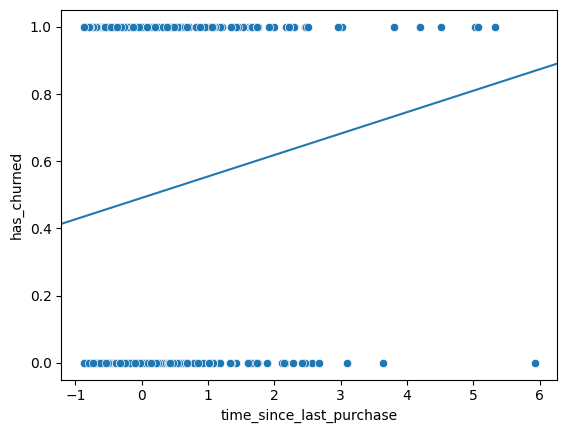

In [52]:
sns.scatterplot(
  data=df_churn
  , x='time_since_last_purchase'
  , y='has_churned'
)
plt.axline( xy1=(0, intercept), slope=slope)
plt.show();

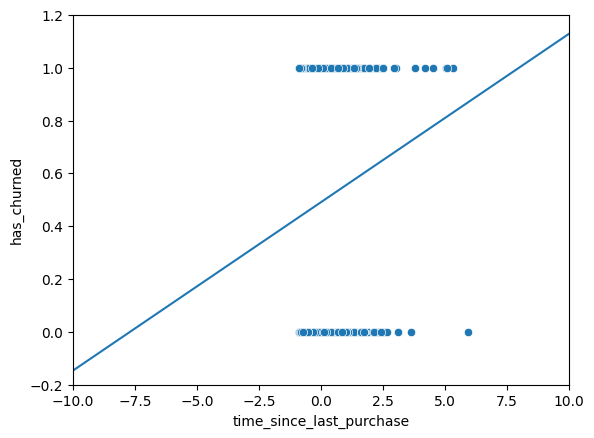

In [53]:
sns.scatterplot(
  data=df_churn
  , x='time_since_last_purchase'
  , y='has_churned'
)
plt.axline( xy1=(0, intercept), slope=slope)
plt.xlim(-10,10)
plt.ylim(-0.2, 1.2)
plt.show();

In [56]:
import statsmodels as sm
mdl_churn_vs_recency_logit = sm.formula.api.logit('has_churned ~ time_since_last_purchase', data=df_churn).fit()
# intercept, slope = mdl_churn_vs_recency_logit.params
mdl_churn_vs_recency_logit.params

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64

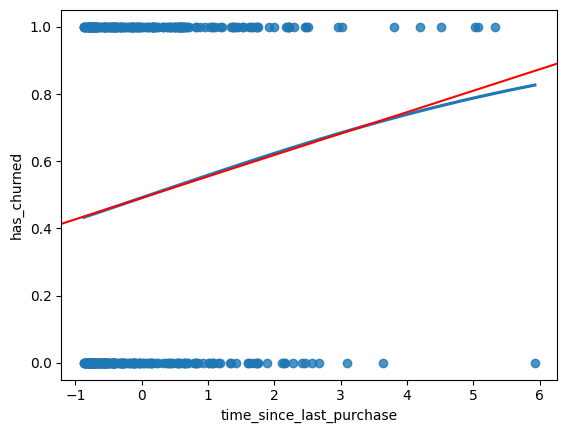

In [57]:
sns.regplot(
  data=df_churn
  , x='time_since_last_purchase'
  , y='has_churned'
  , ci=None
  , logistic=True
)
plt.axline(xy1=(0, intercept), slope=slope, color='red')
plt.show()

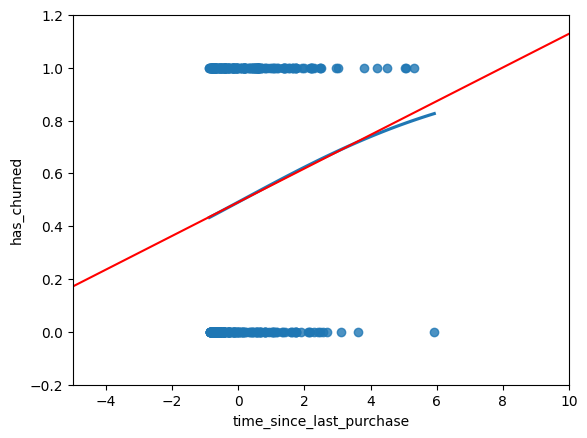

In [58]:
sns.regplot(
  data=df_churn
  , x='time_since_last_purchase'
  , y='has_churned'
  , ci=None
  , logistic=True
)
plt.axline(xy1=(0, intercept), slope=slope, color='red')
plt.xlim(-5, 10)
plt.ylim(-0.2, 1.2)
plt.show()

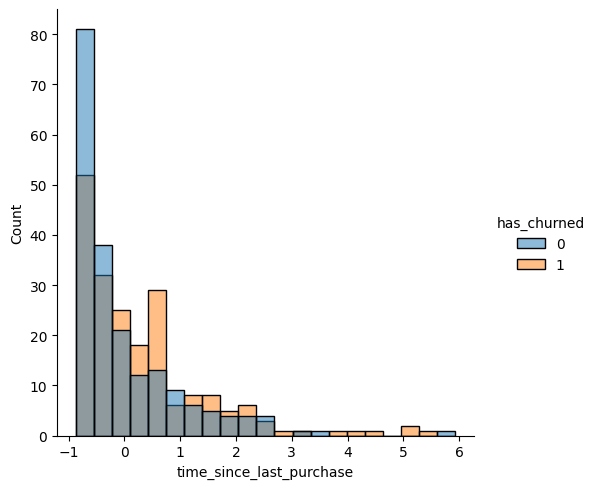

In [59]:
sns.displot(
  data=df_churn
  , x='time_since_last_purchase'
  , hue='has_churned'
);

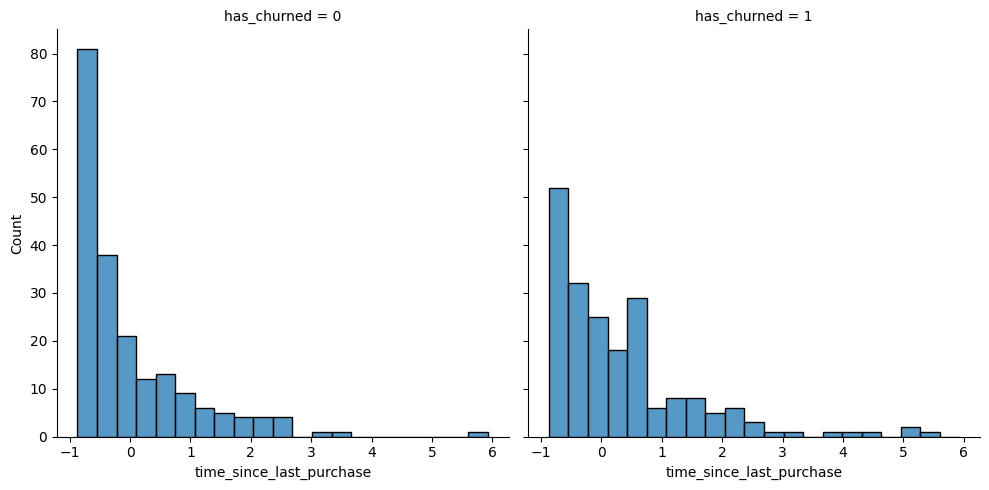

In [60]:
sns.displot(
  data=df_churn
  , x='time_since_last_purchase'
  , col='has_churned'
);

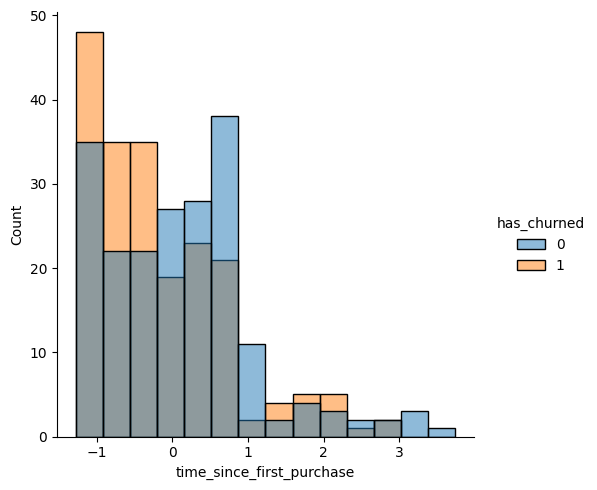

In [61]:
sns.displot(
  data=df_churn
  , x='time_since_first_purchase'
  , hue='has_churned'
);

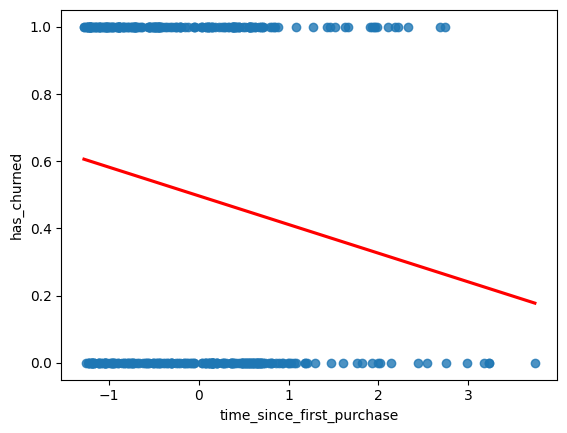

In [62]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(
    data = df_churn
    , x='time_since_first_purchase'
    , y='has_churned'
    , ci=None
    , line_kws={"color": "red"})

plt.show()

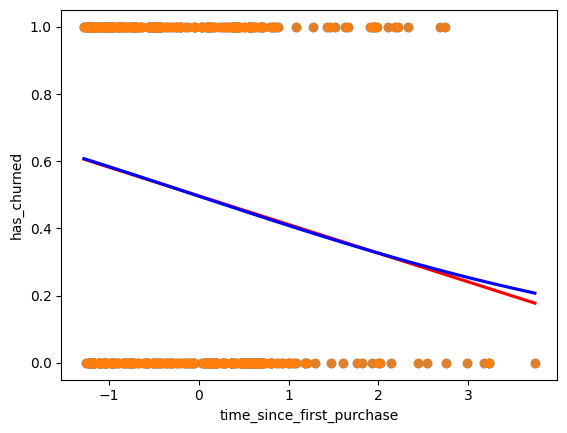

In [63]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(
    data = df_churn
    , x='time_since_first_purchase'
    , y='has_churned'
    , ci=None
    , line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(
    data = df_churn
    , x='time_since_first_purchase'
    , y='has_churned'
    , ci=None
    , logistic=True
    , line_kws={"color": "blue"})

plt.show()

In [ ]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit('has_churned ~ time_since_first_purchase', data=df_churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


### Predictions and odds ratios

In [67]:
mdl_churn_vs_relationship = sfa.ols('has_churned ~ time_since_first_purchase', data=df_churn).fit()
explanatory_data = pd.DataFrame({'time_since_first_purchase':[-1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0]})

# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned
0                      -1.50     0.625279
1                      -1.25     0.603909
2                      -1.00     0.582540
3                      -0.75     0.561171
4                      -0.50     0.539801


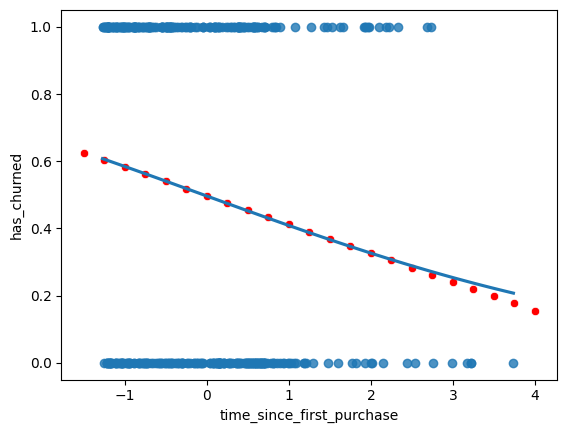

In [72]:
sns.regplot(
    data=df_churn
    , x='time_since_first_purchase'
    , y='has_churned'
    , ci=None
    , logistic=True
)

sns.scatterplot(
    data=prediction_data
    , x='time_since_first_purchase'
    , y='has_churned'
    , color='red'
)

plt.show();

In [73]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data['has_churned'])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.50     0.625279                  1.0
1                      -1.25     0.603909                  1.0
2                      -1.00     0.582540                  1.0
3                      -0.75     0.561171                  1.0
4                      -0.50     0.539801                  1.0


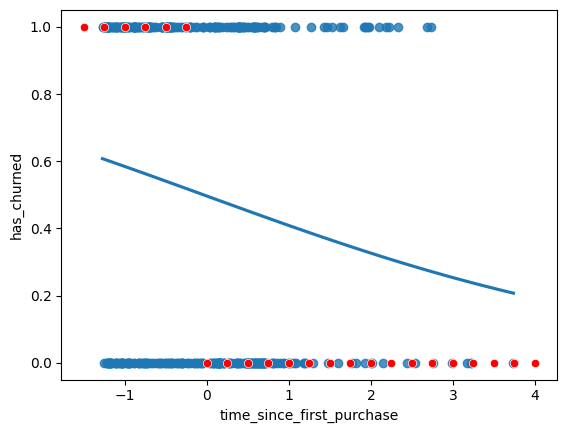

In [75]:
fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(
    data=df_churn
    , x="time_since_first_purchase"
    , y="has_churned"
    , ci=None
    , logistic=True
)

# Overlay with prediction_data, colored red
sns.scatterplot(
    data=prediction_data
    , x='time_since_first_purchase'
    , y='most_likely_outcome'
    , color='red'
)

plt.show();

In [76]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data['has_churned'] / (1-prediction_data['has_churned'])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.50     0.625279                  1.0    1.668652
1                      -1.25     0.603909                  1.0    1.524675
2                      -1.00     0.582540                  1.0    1.395439
3                      -0.75     0.561171                  1.0    1.278790
4                      -0.50     0.539801                  1.0    1.172973


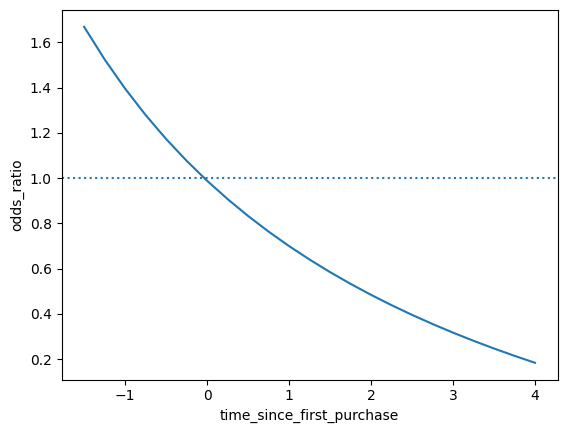

In [78]:
fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(
    data=prediction_data
    , x='time_since_first_purchase'
    , y='odds_ratio'
)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

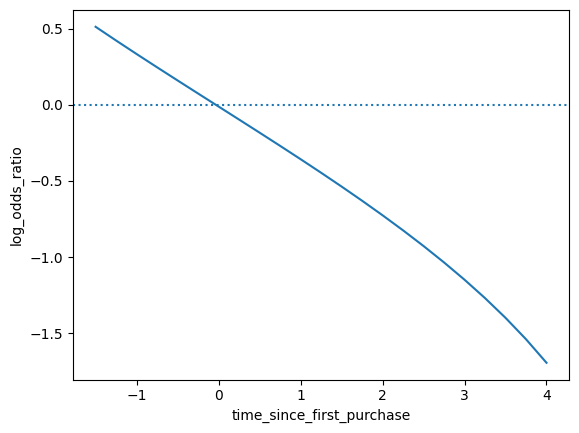

In [79]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

### Quantifying logistic regression fit

#### Confusion matrix

In [80]:
# Get the actual responses
actual_response = df_churn['has_churned']

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame(
    {'actual_response': actual_response,
     'predicted_response': predicted_response}
)

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
Name: count, dtype: int64


In [112]:
pd.DataFrame(np.array(outcomes.value_counts(sort = False)).reshape(2,2), columns=[['predicted',''],['FALSE(N)', 'TRUE(P)']], index=[['actual',''],['FALSE', 'TRUE']])

,,predicted,
,,FALSE(N),TRUE(P)
actual,FALSE,112,88
,TRUE,76,124


In [103]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]
print(f'TP={TP}, TN={TN}, FP={FP}, FN={FN}')

TP=124, TN=112, FP=88, FN=76


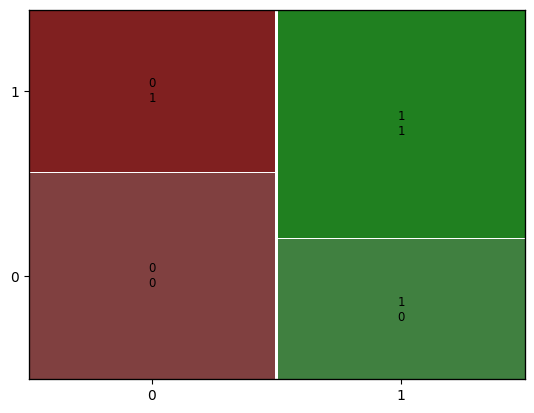

In [98]:
import statsmodels.graphics.mosaicplot as sgm
conf_matrix = np.array(outcomes.value_counts(sort = False)).reshape(2,2)
sgm.mosaic(conf_matrix)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show();

In [100]:
# Calculate and print the accuracy
accuracy = (TN+TP) / (TN+FN+FP+TP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (FN+TP)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN+FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
